<a href="https://colab.research.google.com/github/George090872/Computer-Vision/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Harris Corner Detection & Blob Detection

<b> Objective: </B> During this lab, the goal is to understand the concepts behind Harris Corner Detection and Blob Detection.

<b> Acknowledgment: </B>
<BR />  
1- https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

2- https://learnopencv.com/blob-detection-using-opencv-python-c/
<BR />






Use Harris corner detector to detect corners in `building-1200by1200.tif`. Comment on how changing values of block size affect the overall edge detection.

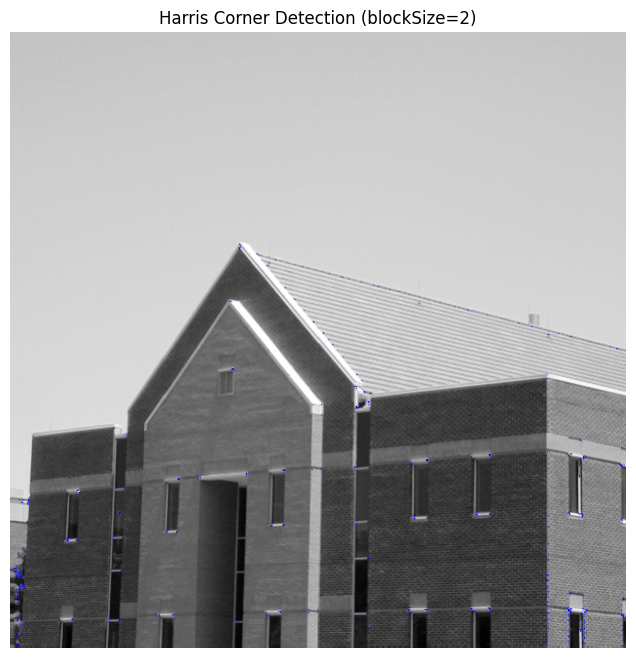

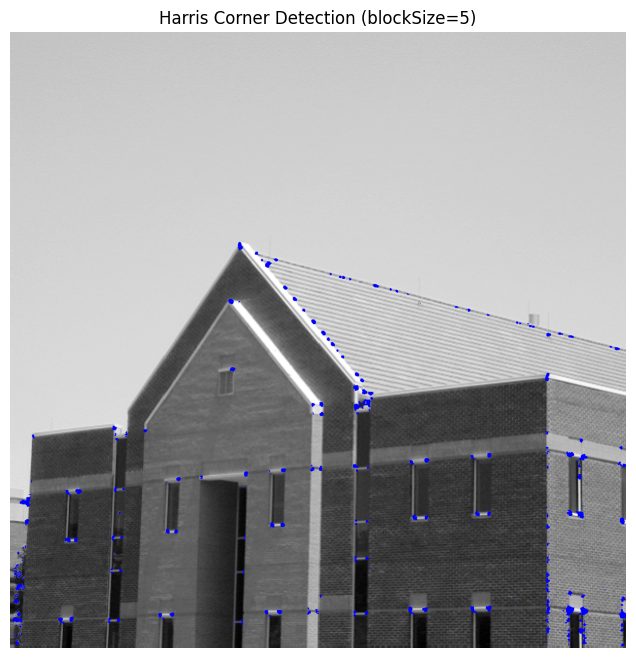

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
filename = 'building-1200by12001.tif'
img = cv2.imread(filename)
def display_harris_corners(input_img, blockSize=2, ksize=7, k=0.04):
    """
    Computes corners in colored image and plot it.
    """
    # first convert to grayscale with float32 values
    gray = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # using opencv harris corner implementation
    corners = cv2.cornerHarris(gray,blockSize,ksize,k)

#     # result is dilated for marking the corners, not important
#     dst = cv2.dilate(dst,None)

    # additional thresholding and marking corners for plotting
    input_img[corners>0.01*corners.max()]=[255,0,0]

    return input_img
    # Display with default block size (blockSize=2)
input_img = display_harris_corners(img)
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection (blockSize=2)")
plt.axis('off')
plt.show()

# Display with larger block size (blockSize=5)
input_img = display_harris_corners(img, blockSize=5)
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection (blockSize=5)")
plt.axis('off')
plt.show()


Use Harris corner deetctor to detect corners in `skewed_chessboard.png`.

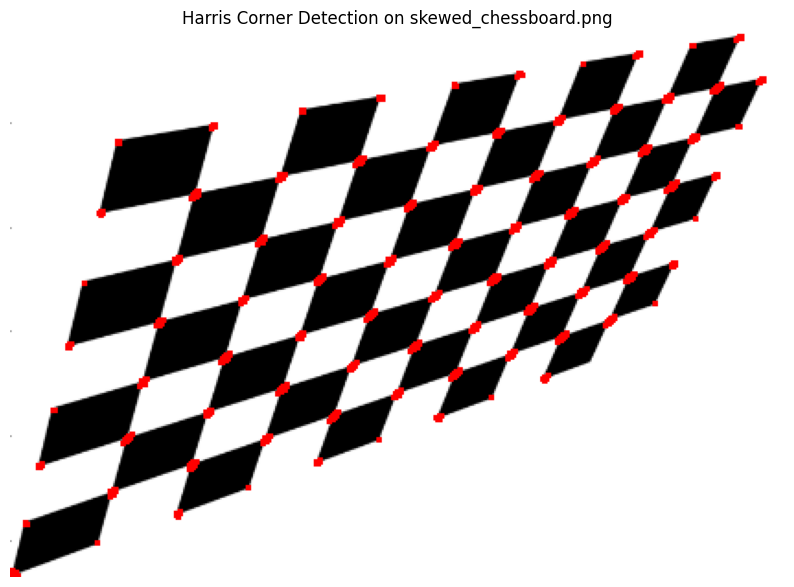

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
filename = 'skewed_chessboard.png'
img = cv2.imread(filename)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris corner detection
gray = np.float32(gray)  # Convert to float32
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)  # Adjust parameters as needed

# Dilate to mark the corners (optional)
dst = cv2.dilate(dst, None)

# Threshold for an optimal value
img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection on skewed_chessboard.png')
plt.axis('off')
plt.show()


Use blob detector to detect blobs in `blob.jpg`. Comment on how changing values of min and max threshold affect the overall blob detection.

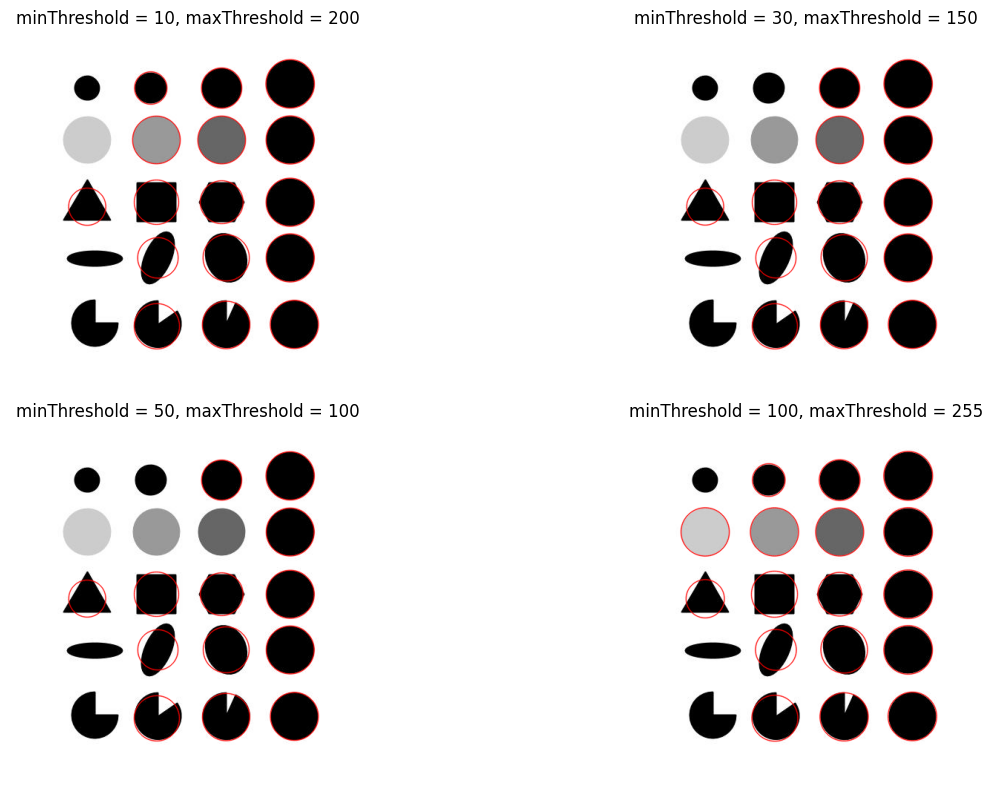

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image in grayscale
im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)

# Define different threshold pairs for testing
threshold_pairs = [(10, 200), (30, 150), (50, 100), (100, 255)]

# Function to detect blobs using different threshold values
def detect_blobs(min_thresh, max_thresh):
    params = cv2.SimpleBlobDetector_Params()

    # Set threshold values
    params.minThreshold = min_thresh
    params.maxThreshold = max_thresh

    # Filter by Area
    params.filterByArea = True
    params.minArea = 1500

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.1

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.87

    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.01

    # Create a detector
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs
    keypoints = detector.detect(im)

    # Draw detected blobs
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return im_with_keypoints

# Plot results for different threshold settings
plt.figure(figsize=(15, 8))

for i, (min_thresh, max_thresh) in enumerate(threshold_pairs):
    im_result = detect_blobs(min_thresh, max_thresh)

    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(im_result, cv2.COLOR_BGR2RGB))
    plt.title(f"minThreshold = {min_thresh}, maxThreshold = {max_thresh}")
    plt.axis('off')

plt.tight_layout()
plt.show()


#Comments on minThreshold and maxThreshold:
* Increasing minThreshold reduces sensitivity,
detecting only brighter blobs.
* Decreasing minThreshold increases sensitivity, detecting more blobs, including faint ones.
* Increasing maxThreshold broadens the range of detectable blob intensities.
* Decreasing maxThreshold narrows the range, making detection more specific to a narrower range of intensities.
*  The optimal values depend heavily on the image and desired outcome.


Perform blob detection on `blob.jpg` in order to:

4.1) Detect circles only.

4.2) Detect squares only.

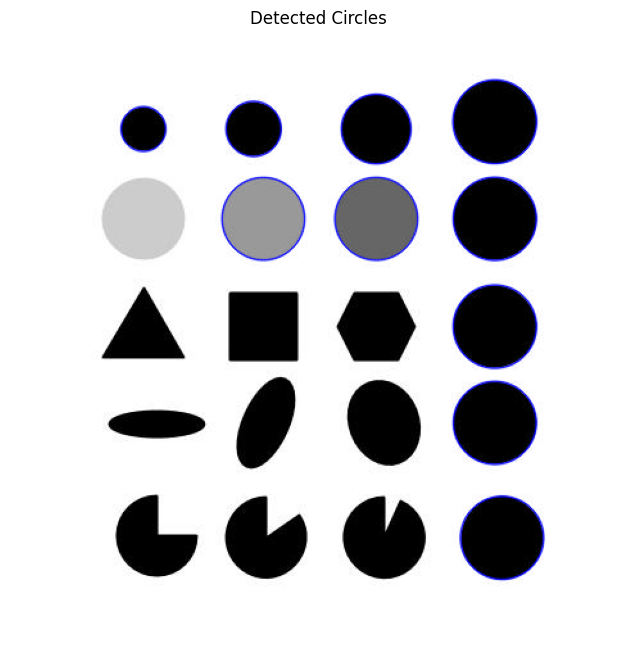

In [ ]:
#4.1 Detect Circles only
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image in grayscale
im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 250

# Filter by Area (Adjust based on expected circle size)
params.filterByArea = True
params.minArea = 500
params.maxArea = 5000  # Adjust as needed

# Filter by Circularity (Only detect circular blobs)
params.filterByCircularity = True
params.minCircularity = 0.9  # Higher value means stricter circle detection
params.maxCircularity = 1.0  # Ensure we only detect near-perfect circles

# Disable unnecessary filters
params.filterByConvexity = False
params.filterByInertia = False

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect circles (blobs)
keypoints = detector.detect(im)

# Draw detected circles as red keypoints
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show detected circles
plt.figure(figsize=(12, 8))
plt.imshow(im_with_keypoints, cmap="gray")
plt.axis("off")
plt.title("Detected Circles")
plt.show()


I could not figure why it did not detect all the circles

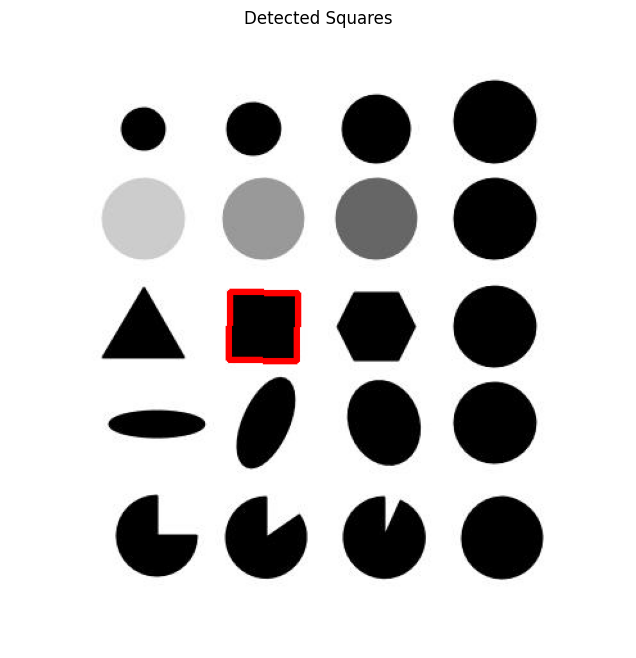

In [ ]:
#4.2 Detect squares only
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image in grayscale
im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(im, (5, 5), 0)

# Perform edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw detected squares
output = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

# Loop through contours and filter squares
for contour in contours:
    epsilon = 0.04 * cv2.arcLength(contour, True)  # Approximate the contour
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:  # A square has 4 vertices
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h  # Check if it's close to 1 (square-like)

        if 0.9 <= aspect_ratio <= 1.1:  # Allow small variations in aspect ratio
            cv2.drawContours(output, [approx], -1, (0, 0, 255), 3)  # Draw square in red

# Show detected squares
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected Squares")
plt.show()


(-0.5, 599.5, 599.5, -0.5)

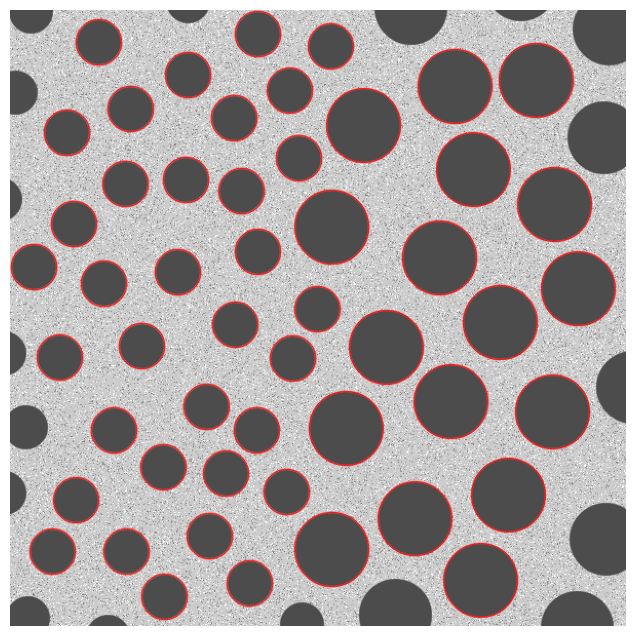

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Read image
im = cv2.imread("blobs.tif", cv2.IMREAD_GRAYSCALE)

#Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

#Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


#Filter by Area.
params.filterByArea = True
params.minArea = 1500

#Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

#Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

#Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

#Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else :
    detector = cv2.SimpleBlobDetector_create(params)


#Detect blobs.
keypoints = detector.detect(im)

#Draw detected blobs as red circles.
#cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
#the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Show blobs
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')

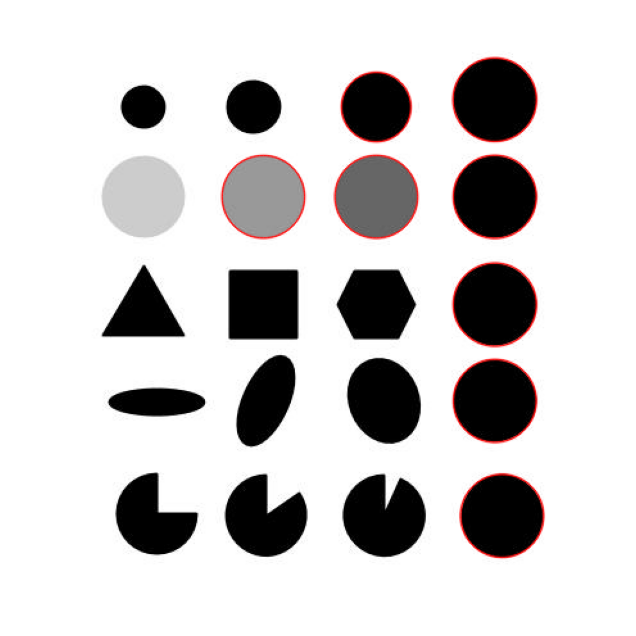

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image in grayscale
im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity (Only detect circular blobs)
params.filterByCircularity = True
params.minCircularity = 0.9  # Higher value means stricter circle detection
params.maxCircularity = 1.0  # Ensure we only detect near-perfect circles

# Disable unnecessary filters (for circles)
params.filterByConvexity = False
params.filterByInertia = False

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show() # Added to display the image

I could not figure why it did not detect all the circles